### Data Fields
datetime - hourly date + timestamp    
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter   
holiday - whether the day is considered a holiday  
workingday - whether the day is neither a weekend nor holiday  
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy  
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog   
temp - temperature in Celsius  
atemp - "feels like" temperature in Celsius  
humidity - relative humidity  
windspeed - wind speed  
casual - number of non-registered user rentals initiated  
registered - number of registered user rentals initiated  
count - number of total rentals  

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
plt.style.use('ggplot')
mpl.rcParams['axes.unicode_minus'] = False


In [5]:
train = pd.read_csv("data/train.csv", parse_dates = ['datetime'])
train.shape

(10886, 12)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [8]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [10]:
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [14]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [18]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

train.shape

(10886, 18)

In [19]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [21]:
plt.rcParams['font.family'] = 'AppleGothic'

[Text(0, 0.5, 'hour'), Text(0.5, 1.0, '시간별 대여량')]

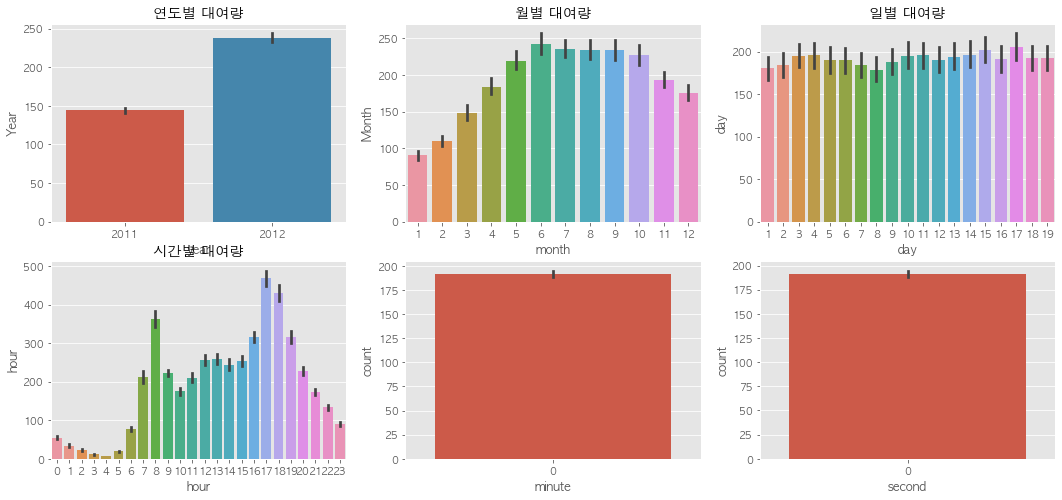

In [22]:
figure, ((ax1, ax2, ax3),(ax4,ax5,ax6)) = plt.subplots(nrows = 2, ncols = 3)
figure.set_size_inches(18,8)

sns.barplot(data=train, x='year', y = 'count', ax = ax1)
sns.barplot(data=train, x='month', y = 'count', ax = ax2)
sns.barplot(data=train, x='day', y = 'count', ax = ax3)
sns.barplot(data=train, x='hour', y = 'count', ax = ax4)
sns.barplot(data=train, x='minute', y = 'count', ax = ax5)
sns.barplot(data=train, x='second', y = 'count', ax = ax6)

ax1.set(ylabel = 'Year', title = '연도별 대여량')
ax2.set(ylabel = 'Month', title = '월별 대여량')
ax3.set(ylabel = 'day', title = '일별 대여량')
ax4.set(ylabel = 'hour', title = '시간별 대여량')


* 2011년도 대여량보다 2012 대여량이 더 크다
* 따뜻할 때의 대여량이 더 크다
* 일별 대여량은 feature로 사용하긴 좀 그렇다
* 출퇴근 시간 대여량이 높아보이고, 새벽 사용량 적어보인다
* 분초 사용량은 사용하기가 좀 그렇다


[Text(0.5, 0, 'Working Day'), Text(0, 0.5, 'count'), Text(0.5, 1.0, '대여량')]

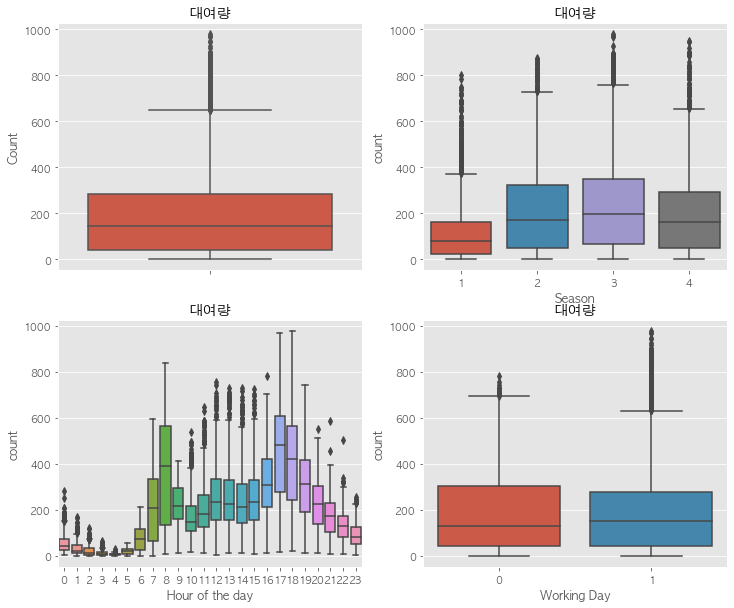

In [23]:
fig,axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(12,10)
sns.boxplot(data = train, y ='count', orient = "v", ax = axes[0][0])
sns.boxplot(data = train, y ='count', x = 'season', orient = "v", ax = axes[0][1])
sns.boxplot(data = train, y ='count', x = 'hour', orient = "v", ax = axes[1][0])
sns.boxplot(data = train, y ='count', x = 'workingday', orient = "v", ax = axes[1][1])

axes[0][0].set(ylabel='Count',title='대여량')
axes[0][1].set(xlabel='Season',ylabel ='count',title='대여량')
axes[1][0].set(xlabel='Hour of the day',ylabel ='count',title='대여량')
axes[1][1].set(xlabel='Working Day',ylabel ='count',title='대여량')


In [25]:
train['dayofweek'] = train["datetime"].dt.dayofweek

In [26]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


In [27]:
train['dayofweek'].value_counts()

5    1584
6    1579
3    1553
0    1551
2    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

<AxesSubplot:xlabel='hour', ylabel='count'>

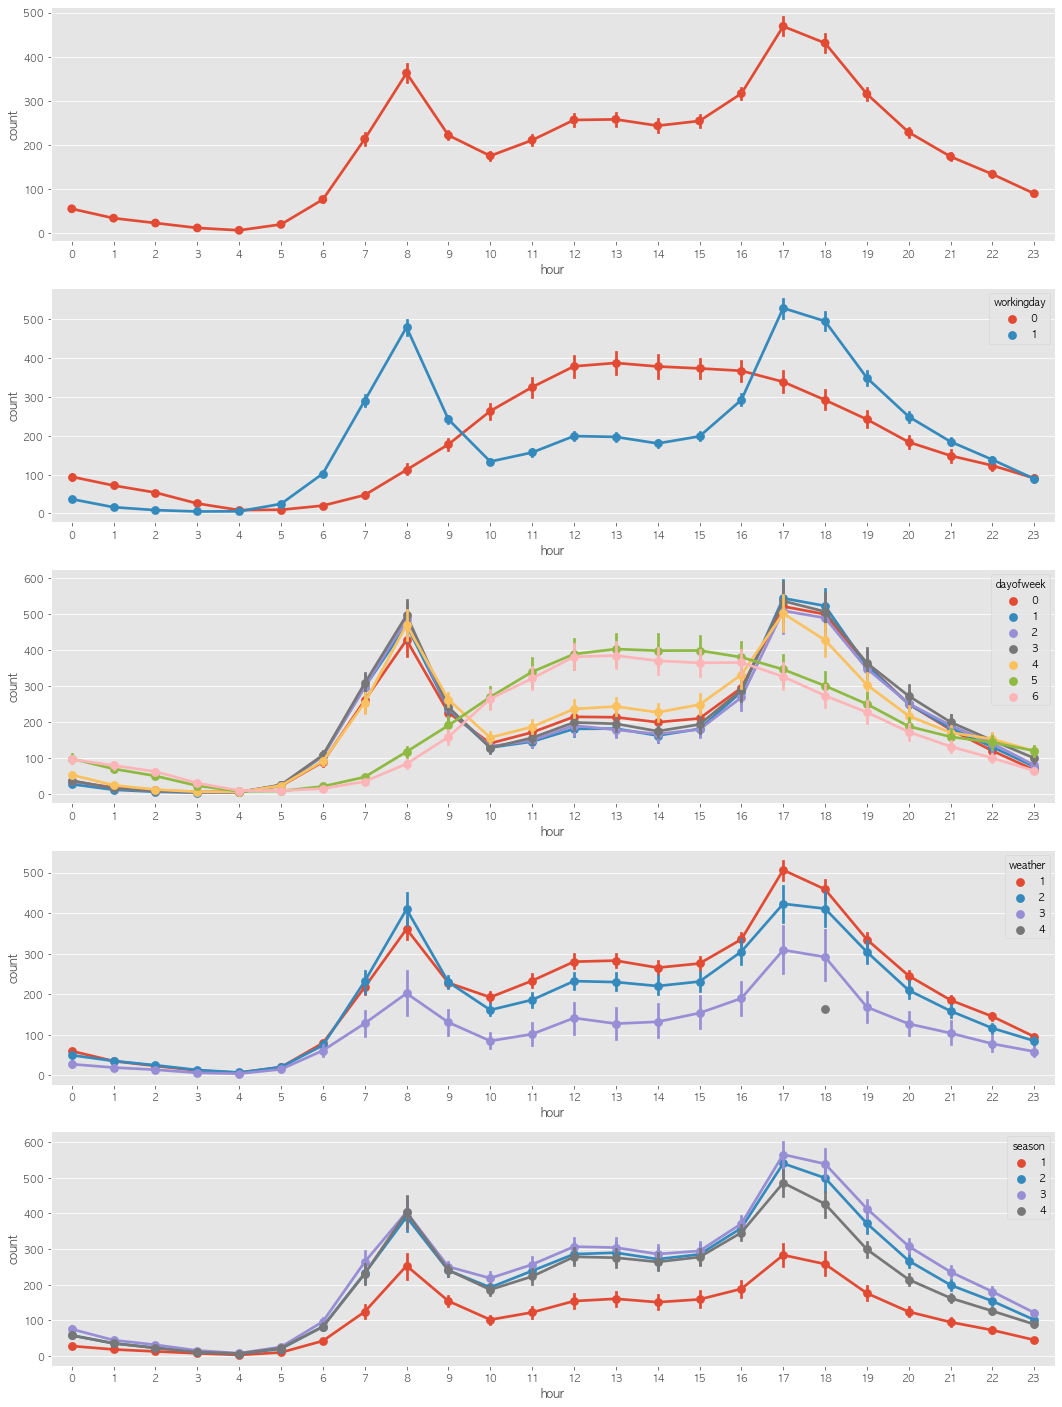

In [28]:
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows = 5)
fig.set_size_inches(18,25)

sns.pointplot(data=train,x='hour',y='count', ax = ax1)
sns.pointplot(data=train,x='hour',y='count',hue = 'workingday', ax = ax2)
sns.pointplot(data=train,x='hour',y='count',hue = 'dayofweek', ax = ax3)
sns.pointplot(data=train,x='hour',y='count',hue = 'weather', ax = ax4)
sns.pointplot(data=train,x='hour',y='count',hue = 'season', ax = ax5)


In [30]:
corrMatt = train[['temp','atemp','casual','registered','humidity','windspeed','count']]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.trill_indices_from(mask)] = False

                temp     atemp    casual  registered  humidity  windspeed  \
temp        1.000000  0.984948  0.467097    0.318571 -0.064949  -0.017852   
atemp       0.984948  1.000000  0.462067    0.314635 -0.043536  -0.057473   
casual      0.467097  0.462067  1.000000    0.497250 -0.348187   0.092276   
registered  0.318571  0.314635  0.497250    1.000000 -0.265458   0.091052   
humidity   -0.064949 -0.043536 -0.348187   -0.265458  1.000000  -0.318607   
windspeed  -0.017852 -0.057473  0.092276    0.091052 -0.318607   1.000000   
count       0.394454  0.389784  0.690414    0.970948 -0.317371   0.101369   

               count  
temp        0.394454  
atemp       0.389784  
casual      0.690414  
registered  0.970948  
humidity   -0.317371  
windspeed   0.101369  
count       1.000000  


AttributeError: module 'numpy' has no attribute 'trill_indices_from'

<AxesSubplot:xlabel='humidity', ylabel='count'>

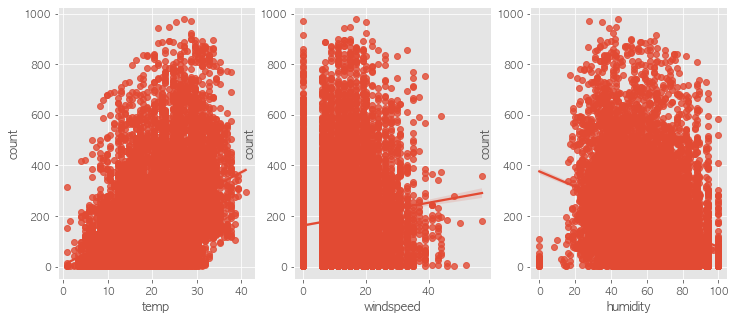

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12,5)
sns.regplot(x='temp',y='count',data=train,ax =ax1)
sns.regplot(x='windspeed',y='count',data=train,ax =ax2)
sns.regplot(x='humidity',y='count',data=train,ax =ax3)

windspeed는 0에 몰려있는 값이 매우 많다